In [22]:
import pandas as pd
import matplotlib.pyplot 
import seaborn as sns
df=pd.read_csv('https://data.humdata.org/dataset/7fb6fbc6-69b7-4b90-ace1-ca04dc6d53ac/resource/33de764b-6359-4a65-8df6-75281ade843d/download/wfp_food_prices_zaf.csv') 
df.head(5)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.8,0.1289
2,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.86,0.1378
3,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Wheat,KG,actual,Wholesale,ZAR,0.65,0.1042
4,2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.8,0.1265


# Droping the first frow

In [24]:
df.drop(df.index[[0]], inplace=True)

In [13]:
df.columns

Index(['admin1', 'admin2', 'market', 'latitude', 'longitude', 'category',
       'commodity', 'unit', 'priceflag', 'pricetype', 'currency', 'price',
       'usdprice', 'year', 'month'],
      dtype='object')

####Checking dataframe information 

In [41]:
df.info()
df.describe(include='all') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       811 non-null    object
 1   admin1     811 non-null    object
 2   admin2     811 non-null    object
 3   market     811 non-null    object
 4   latitude   811 non-null    object
 5   longitude  811 non-null    object
 6   category   811 non-null    object
 7   commodity  811 non-null    object
 8   unit       811 non-null    object
 9   priceflag  811 non-null    object
 10  pricetype  811 non-null    object
 11  currency   811 non-null    object
 12  price      811 non-null    object
 13  usdprice   811 non-null    object
dtypes: object(14)
memory usage: 88.8+ KB


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,811,811,811,811,811,811,811,811,811,811,811,811,811,811
unique,271,2,2,2,2,2,2,4,2,2,2,2,363,691
top,2011-03-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.88,0.2323
freq,3,810,810,810,810,810,810,270,810,810,810,810,8,5


Checking for null values 

In [43]:
df.isna().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

Checking for duplicates 

In [44]:
df.duplicated().sum() 

0

# Splitting the date column to year and month

In [25]:
df['year']=df['date'].str.split(pat='-').str[0].astype('int')
df['month']=df['date'].str.split(pat='-').str[1].astype('int') 
df.drop(columns='date', inplace=True) 

In [12]:
df.head()

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month
1,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.8,0.1289,2000,1
2,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.86,0.1378,2000,1
3,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Wheat,KG,actual,Wholesale,ZAR,0.65,0.1042,2000,1
4,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.8,0.1265,2000,2
5,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.83,0.1311,2000,2


# Changing numeric column's dtypes to floats

In [26]:
df=df.astype({'latitude':'float', 'longitude':'float','price' :'float','usdprice' :'float'}) 

# Renaming the 1st two columns

In [27]:
df=df.rename(columns ={'admin1':'province','admin2':'municipality'})

In [28]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 1 to 810
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   province      810 non-null    object 
 1   municipality  810 non-null    object 
 2   market        810 non-null    object 
 3   latitude      810 non-null    float64
 4   longitude     810 non-null    float64
 5   category      810 non-null    object 
 6   commodity     810 non-null    object 
 7   unit          810 non-null    object 
 8   priceflag     810 non-null    object 
 9   pricetype     810 non-null    object 
 10  currency      810 non-null    object 
 11  price         810 non-null    float64
 12  usdprice      810 non-null    float64
 13  year          810 non-null    int64  
 14  month         810 non-null    int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 95.1+ KB


The average price of commodity for each province each year? 

In [29]:
df.corr(numeric_only =True) 

,latitude,longitude,price,usdprice,year,month
latitude,NaN,NaN,NaN,NaN,NaN,NaN
longitude,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,NaN,1.000000,0.781687,0.788365,-0.013142
usdprice,NaN,NaN,0.781687,1.000000,0.476075,-0.014970
year,NaN,NaN,0.788365,0.476075,1.000000,-0.033423
month,NaN,NaN,-0.013142,-0.014970,-0.033423,1.000000


<Axes: >

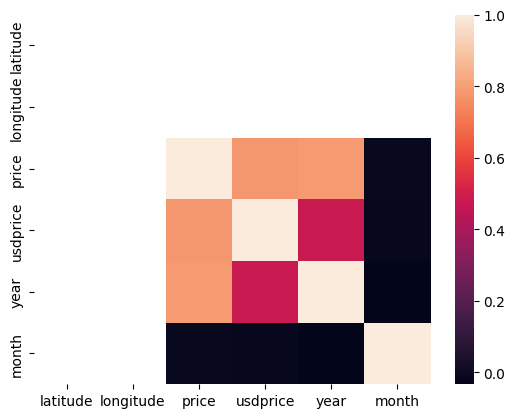

In [30]:
sns.heatmap(df.corr(numeric_only=True)) 

In [65]:
df['year'].value_counts()

year
2000    36
2012    36
2021    36
2020    36
2019    36
2018    36
2017    36
2016    36
2015    36
2014    36
2013    36
2011    36
2001    36
2010    36
2009    36
2008    36
2007    36
2006    36
2005    36
2004    36
2003    36
2002    36
2022    18
Name: count, dtype: int64

In [28]:
import numpy as np
grouped = df.groupby('year')
df_by_year=grouped["price"].agg(lambda x: np.mean(x)) 
df_by_year

year
2000    0.705714
2001    1.004722
2002    1.594444
2003    1.012778
2004    1.030833
2005    0.784722
2006    1.251111
2007    2.021667
2008    2.392778
2009    1.819722
2010    1.627500
2011    2.276944
2012    2.652778
2013    2.670556
2014    2.780833
2015    3.210556
2016    4.068611
2017    2.827222
2018    2.802222
2019    3.338333
2020    3.708056
2021    4.019444
2022    5.100000
Name: price, dtype: float64

Text(0, 0.5, 'Avarage Price')

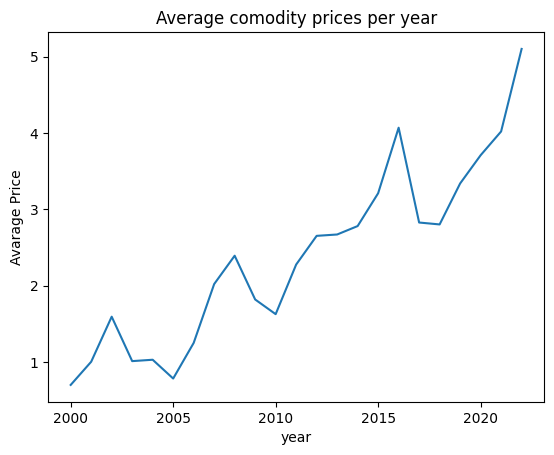

In [9]:
import matplotlib.pyplot as plt
df_by_year.plot(kind='line')
plt.title("Average comodity prices per year")
plt.ylabel('Avarage Price') 

In [29]:
df['commodity'].value_counts()

commodity
Maize (white)     270
Maize (yellow)    270
Wheat             270
Name: count, dtype: int64

In [9]:
df_white_maize=df[df['commodity'] =='Maize (white)'] 
df_white_maize.head()

,province,municipality,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month
1,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1289,2000,1
4,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1265,2000,2
7,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.75,0.1166,2000,3
10,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.69,0.1035,2000,4
13,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.67,0.0972,2000,5


/tmp/ipykernel_33/3778385820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_white_maize['price'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


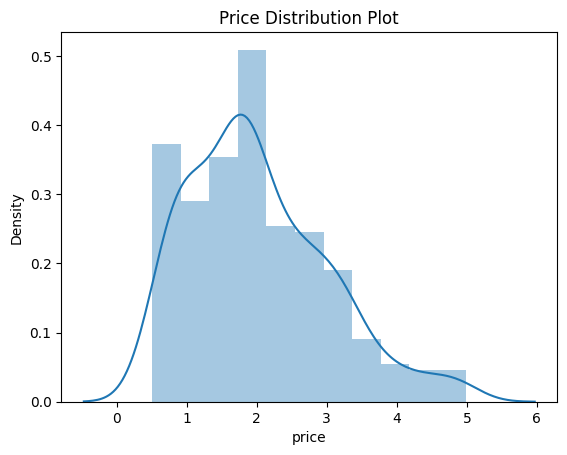

In [37]:
plt.title('Price Distribution Plot')
sns.distplot(df_white_maize['price'])
plt.show()

Text(0, 0.5, 'price')

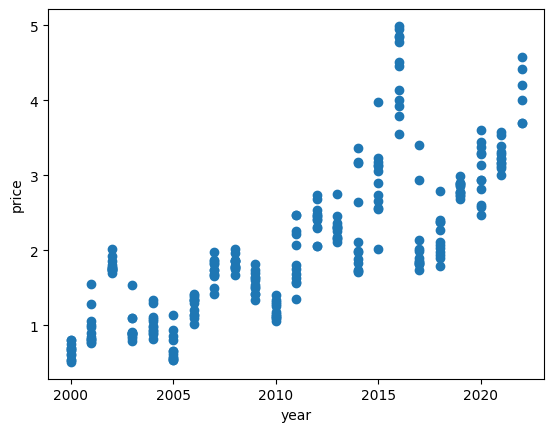

In [36]:
plt.scatter(x=df_white_maize['year'], y=df_white_maize['price'])
plt.xlabel('year') 
plt.ylabel('price')

In [10]:
X = df_white_maize.iloc[:, 13:-1].values  # independent
y = df_white_maize.iloc[:, 12].values  # dependentlr = LinearRegression()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lr = LinearRegression()
lr.fit(X, y)

# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree = 7)
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)

LinearRegression()

In [30]:
# Predict results
y_pred_lr = lr.predict(X)           # Linear Regression
y_pred_poly = lr_2.predict(X_poly)

<function matplotlib.pyplot.show(close=None, block=None)>

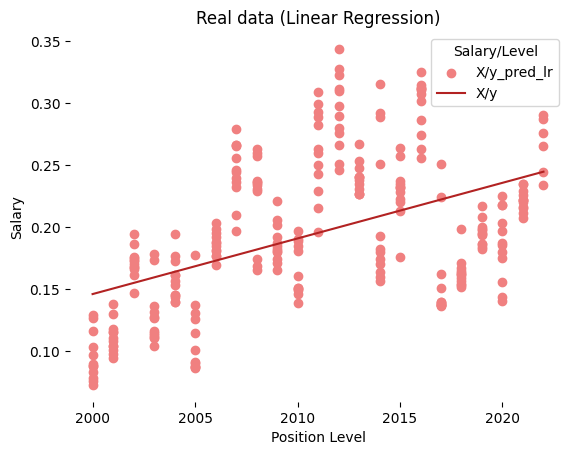

In [31]:
# Visualize real data with linear regression
import matplotlib.pyplot as plt 
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr.predict(X), color = 'firebrick')
plt.title('Real data (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show

/tmp/ipykernel_33/4120868496.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


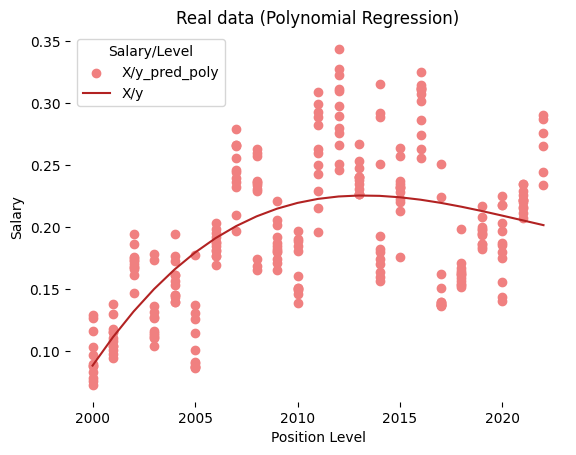

In [32]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr_2.predict(X_poly), color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()